In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Import data sets
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
customer_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
transaction_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

In [36]:
# merge data sets
half_data = pd.merge(transaction_data, cab_data, on='Transaction ID')
data = pd.merge(customer_data, half_data, on='Customer ID')

In [4]:
data['Profit'] = data['Price Charged'] - data['Cost of Trip']

In [38]:
data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64

In [5]:
data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808


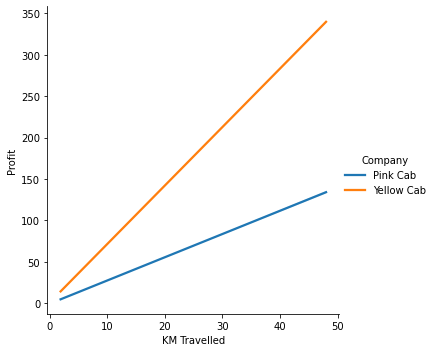

In [9]:
# Profit by Km Travelled
sns.lmplot(x='KM Travelled', y='Profit', hue='Company', data=data, scatter=False)

In [22]:
bin_edges = [42371, 42736, 43101, data['Date of Travel'].max()]
bin_labels = ['2016', '2017', '2018']
#data['Date of Travel'] = pd.cut(data['Date of Travel'], bins=3, labels=bin_labels)
data['Date of Travel'] = data['Date of Travel'].astype(float)

#sns.lmplot(x='Date of Travel', y='Profit', hue='Company', data=data, scatter=False)

[42371, 42736, 43101, 43465]


In [18]:
missing = data['Date of Travel'].isnull()
print(missing.sum())

0


In [19]:
invalid = []

for value in data['Date of Travel']:
    try:
        pd.to_numeric(value)
    except ValueError:
        invalid.append(value)
        
print(invalid)

[]


In [30]:
data['Year'] = data['Date of Travel'].astype(int)
profit_sum = data.groupby(['Year', 'Company'])['Profit'].sum()

print(profit_sum)


Year  Company   
2016  Pink Cab      1.713511e+06
      Yellow Cab    1.392700e+07
2017  Pink Cab      2.033655e+06
      Yellow Cab    1.657598e+07
2018  Pink Cab      1.560162e+06
      Yellow Cab    1.351740e+07
Name: Profit, dtype: float64


<AxesSubplot:xlabel='Year', ylabel='Profit'>

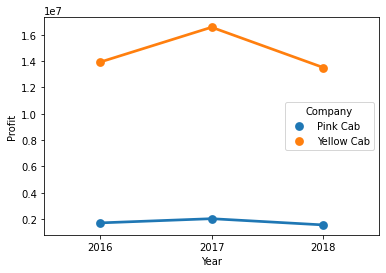

In [31]:
# Profit Analysis by year
profit_df = profit_sum.reset_index()
profit_df.columns = ['Year', 'Company', 'Profit']
sns.pointplot(x='Year', y='Profit', hue='Company', data=profit_df)

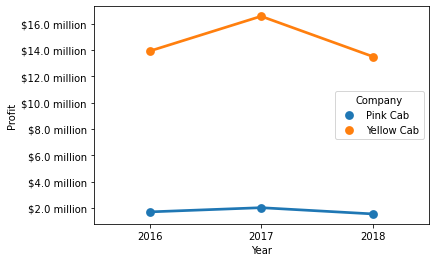

In [32]:
import matplotlib.ticker as ticker

def millions(x, pos):
    return '$%1.1f million' % (x * 1e-6)

formatter = ticker.FuncFormatter(millions)

sns.pointplot(x='Year', y='Profit', hue='Company', data=profit_df)
plt.gca().yaxis.set_major_formatter(formatter)


In [39]:
## Profit Analysis


<AxesSubplot:xlabel='KM Travelled Binned', ylabel='count'>

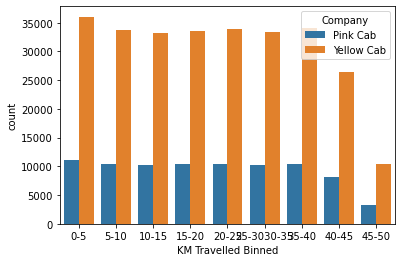

In [43]:
# Ride distance analysis
bin_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'
             '30-35', '35-40', '40-45', '45-50']
data['KM Travelled Binned'] = pd.cut(data['KM Travelled'], bins=9, labels=bin_labels)
sns.countplot(x='KM Travelled Binned', hue='Company', data=data)



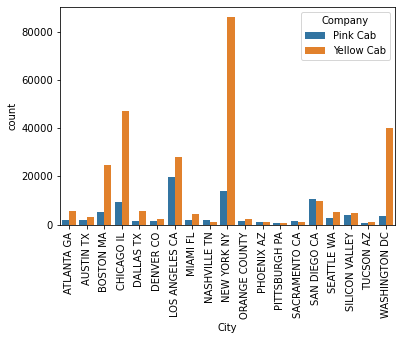

In [41]:
# Number of cab users by city
counts = data.groupby(['City', 'Company']).size().reset_index(name='count')
sns.barplot(x='City', hue='Company', y='count', data=counts)
plt.xticks(rotation=90)
plt.show()
